# L01 Analysis

Machine learning on the L01 (Antimetabolites) dataset extracted from main gctx

## Importing Basic Info

In [3]:
import pandas as pd
import numpy as np
from cmapPy.pandasGEXpress.parse import parse
from collections import Counter

Importing gene info (for analysis on specific genes such as top # varying or landmark genes)

In [4]:
gene_info = pd.read_csv("geneinfo_beta.txt", sep = "\t", dtype = str)
gene_info

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
0,750,GAS8-AS1,ENSG00000221819,GAS8 antisense RNA 1,ncRNA,NCBI,inferred
1,6315,ATXN8OS,NaN,ATXN8 opposite strand lncRNA,ncRNA,NCBI,inferred
2,7503,XIST,ENSG00000229807,X inactive specific transcript,ncRNA,NCBI,inferred
3,8552,INE1,ENSG00000224975,inactivation escape 1,ncRNA,NCBI,inferred
4,9834,FAM30A,ENSG00000226777,family with sequence similarity 30 member A,ncRNA,NCBI,inferred
...,...,...,...,...,...,...,...
12323,100287932,TIMM23,ENSG00000265354,translocase of inner mitochondrial membrane 23,protein-coding,NCBI,best inferred
12324,100289678,ZNF783,ENSG00000204946,zinc finger family member 783,protein-coding,NCBI,best inferred
12325,100507436,MICA,ENSG00000204520,MHC class I polypeptide-related sequence A,protein-coding,NCBI,best inferred
12326,9142,TMEM257,ENSG00000221870,transmembrane protein 257,protein-coding,NCBI,best inferred


In [5]:
landmark_ids = gene_info["gene_id"][gene_info["feature_space"] == "landmark"]
landmark_ids

2154        16
2155        23
2156        25
2157        30
2158        39
         ...  
3127    200081
3128    200734
3129    256364
3130    375346
3131    388650
Name: gene_id, Length: 978, dtype: object

Importing parsed C02 data

In [6]:
L01_gctoo = parse("L01_gctoo.gctx", rid = landmark_ids)
L01_gctoo

Extracting info from gctx

In [7]:
df = L01_gctoo.data_df
df = df.T
df

rid,10007,1001,10013,10038,10046,10049,10051,10057,10058,10059,...,9918,9924,9926,9928,993,994,9943,9961,998,9988
cid,,,,,,,,,,,,,,,,,,,,,
ABY001_A375_XH:BRD-K19687926:0.625:24,-1.736714,0.289548,-0.361589,-0.020479,-0.089499,0.687541,-0.554210,1.290856,0.046671,-1.619699,...,0.125671,0.379467,0.015554,0.073519,0.571169,0.966281,-0.118693,-0.240500,0.328689,-0.035888
ABY001_A375_XH:BRD-K19687926:0.625:3,1.032662,-0.493885,0.255597,0.482932,0.081523,0.139812,0.177293,0.290358,0.367454,0.030903,...,-0.520860,0.463610,-0.020359,-0.101973,-0.240654,-0.052869,-0.285709,0.102792,-0.072477,0.733337
ABY001_A375_XH:BRD-K19687926:10:24,2.144441,1.299909,0.017096,-1.328177,-0.628925,0.049838,-0.099104,-1.217991,-1.935527,-2.015425,...,-1.043801,-4.322631,-1.145696,-0.038187,0.041450,-2.383717,3.316954,0.631960,0.169808,0.854738
ABY001_A375_XH:BRD-K19687926:10:3,-0.222550,0.978726,0.761306,0.261878,-0.104222,0.441134,-0.279905,0.440588,-0.857185,-1.225554,...,1.285871,0.973169,0.514684,0.232644,0.261149,0.654366,-0.230773,-0.400357,-0.269708,0.489530
ABY001_A375_XH:BRD-K19687926:2.5:24,0.236579,0.201499,0.548347,0.282435,-0.766408,0.219889,0.866969,0.554607,-0.564185,-1.029729,...,0.684979,-0.649435,-0.948668,-0.094974,-0.141214,0.245188,-0.263202,0.231828,-0.267561,-0.555847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSAI001_APP11NPC1_XH:BRD-K81418486:2.5,-0.034372,0.770192,-2.161487,-2.020192,0.041631,0.608978,-0.530020,-1.232782,-1.208677,-1.180001,...,0.149036,-4.754356,-1.164484,-0.378128,-2.043281,-0.449018,0.018232,1.462651,-0.846990,-0.257475
TSAI001_ND347327_XH:BRD-K81418486:2.5,0.434514,1.559073,-0.494657,-4.245282,1.298462,1.303731,-1.753595,-0.628953,-2.951184,-0.991806,...,2.528416,-0.411042,-6.626046,-0.497450,-0.738706,-3.344820,0.030449,2.537470,-0.810170,-1.355578
TSAI001_SAD11NPC4_XH:BRD-K81418486:2.5,-1.420643,3.217460,-0.212197,-0.810958,-0.743134,2.446625,-1.588253,-0.088006,-0.494590,-0.408357,...,1.581375,0.107644,0.523674,0.266645,-2.759670,0.258124,-3.663426,1.650416,-0.674829,-0.691937


In [8]:
df.shape

(50880, 978)

Top varying genes analysis

In [ ]:
# var = df.var()
# topvar = var.nlargest(300)
# row_ids = pd.Series(topvar.index.values, index = topvar)

# row_ids
# L01_gctoo = parse("C:/Users/tp36t/Desktop/Research/L01_gctoo.gctx", rid = row_ids)


# df = L01_gctoo.data_df
# df = df.T
# print(df.shape)

Before preceeding, a method to generate a boolean vector of whether a specific sample is in the drug class of interest is required

## Reverse Dictionary

Step 1: sig_id_to_ATC function : returns list of ATC codes from list of sig_ids (helper function) 

Step 2: boolean_vector_generator function: used to generate a boolean vector to label whether each sample is in the drug class of interest (e.g. we are trying to investigate C02A Antiadrenergic agents, centrally acting; when we input the sig_ids of all C02 compounds, a list of 0/1 is returned corresponding to whether the ATC code for each drug is classfied as C02A) 

**Step 1: sig_id_to_ATC**

Importing required dictionaries and metadata

In [12]:
sig_info = pd.read_csv("siginfo_beta.txt", sep = "\t", dtype=str)
sig_info

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,sig_id,pert_type,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_ncs_exemplar
0,b17,NaN,100,ug/ml,100 ug/ml,336 h,336,h,N8,BRD-U44432129,...,MET001_N8_XH:BRD-U44432129:100:336,trt_cp,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0
1,b15,10,10,uM,10 uM,3 h,3,h,A549,BRD-K81418486,...,ABY001_A549_XH:BRD-K81418486:10:3,trt_cp,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0
2,b15,2.5,2.5,uM,2.5 uM,24 h,24,h,HT29,BRD-K70511574,...,ABY001_HT29_XH:BRD-K70511574:2.5:24,trt_cp,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0
3,b18,10,10,uM,10 uM,3 h,3,h,HME1,BRD-K81418486,...,LTC002_HME1_3H:BRD-K81418486:10,trt_cp,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0
4,b15,10,10,uM,10 uM,3 h,3,h,H1975,BRD-A61304759,...,ABY001_H1975_XH:BRD-A61304759:10:3,trt_cp,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202651,b18,10,10,uM,10 uM,24 h,24,h,HCC515,BRD-K48853221,...,DOSVAL001_HCC515_24H:BRD-K48853221:10,trt_cp,HCC515,K01,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:K01|DOSVAL001_HCC5...,NaN,DOSVAL,BRD-K48853221,1
1202652,b18,10,10,uM,10 uM,24 h,24,h,HCC515,BRD-K90382497,...,DOSVAL001_HCC515_24H:BRD-K90382497:10,trt_cp,HCC515,O03,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:O03|DOSVAL001_HCC5...,NaN,DOSVAL,GW-843682X,0
1202653,b19,20,20,uM,20 uM,24 h,24,h,HCC515,BRD-K45785972,...,DOSVAL002_HCC515_24H:BRD-K45785972:20,trt_cp,HCC515,M22,DOSVAL002_HCC515_24H_X1.L2_B19|DOSVAL002_HCC51...,DOSVAL002_HCC515_24H_X1.L2_B19:M22|DOSVAL002_H...,NaN,DOSVAL,BRD-K45785972,0
1202654,b19,4,5,uM,4 uM,24 h,24,h,A375,BRD-K28513938,...,DOSVAL004_A375_24H:BRD-K28513938:5,trt_cp,A375,E09,DOSVAL004_A375_24H_X1.A2_B19|DOSVAL004_A375_24...,DOSVAL004_A375_24H_X1.A2_B19:E09|DOSVAL004_A37...,NaN,DOSVAL,BRD-K28513938,0


In [13]:
dictionary = pd.read_csv("../Dictionaries/ATC_to_pert_id_dictionary.txt") # From ATC Dictionary
dictionary

,Unnamed: 0,ATC_Code,cids,Compound_Name,inchi_key,pert_id
0,0,N05AX17,10071196,Pimavanserin,RKEWSXXUOLRFBX-UHFFFAOYSA-N,BRD-K83405785
1,1,L01EX06,10074640,Masitinib,WJEOLQLKVOPQFV-UHFFFAOYSA-N,BRD-K71035033
2,2,B01AC26,10077130,Vorapaxar,ZBGXUVOIWDMMJE-QHNZEKIYSA-N,BRD-K93442924
3,3,A10BH05,10096344,Linagliptin,LTXREWYXXSTFRX-QGZVFWFLSA-N,BRD-K96550715
4,4,L01EX03,10113978,Pazopanib,CUIHSIWYWATEQL-UHFFFAOYSA-N,BRD-K74514084
...,...,...,...,...,...,...
1413,1413,L01EK02,9933475,Cediranib,XXJWYDDUDKYVKI-UHFFFAOYSA-N,BRD-K86930074
1414,1414,H01CB05,9941444,Pasireotide,VMZMNAABQBOLAK-DBILLSOUSA-N,BRD-K59715032
1415,1415,L01XX53,9952884,Vosaroxin,XZAFZXJXZHRNAQ-STQMWFEESA-N,BRD-K23677682
1416,1416,N06AX26,9966051,Vortioxetine,YQNWZWMKLDQSAC-UHFFFAOYSA-N,BRD-K53963539


In [14]:
def sig_id_to_ATC(sig_id):
     pert_id = sig_info.loc[sig_info["sig_id"] == sig_id, "pert_id"].values[0]
     ATC = dictionary.loc[dictionary.pert_id == pert_id, "ATC_Code"].values[0]
     return ATC

Testing sig_id_to_ATC

In [15]:
sig_id_to_ATC("CPC001_PC3_24H:M19").startswith("C02")

True

**Step 2: boolean_vector_generator**

In [16]:
def boolean_vector_generator(ATC_Code):
    sig_ids = df.index.values
    is_of_interest = []
    for id in sig_ids:
        if sig_id_to_ATC(id).startswith(ATC_Code):
            is_of_interest.append(1)
        else:
            is_of_interest.append(0)
    is_of_interest_array = np.array(is_of_interest)
    return is_of_interest_array

In [19]:
is_of_interest_array = boolean_vector_generator("L01B")
is_of_interest_array

KeyboardInterrupt: 

Saving array

In [ ]:
np.savetxt("antimetabolites.csv", is_of_interest_array, fmt = "%d", delimiter=",") #Saving array for C02A so boolean_vector_generator doesn't have to run every time

Loading array

In [9]:
is_of_interest_array = np.loadtxt("antimetabolites.csv", delimiter = ",")
is_of_interest_array.astype(int)
is_of_interest_array


array([0., 0., 0., ..., 0., 0., 0.])

## Supervised ML

In [10]:
X = df.values # Gene expression data for different perturbagens
y = is_of_interest_array.astype(int) # Boolean array of whether drug is in ATC subclass 

Splitting data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test

(array([[-4.11696643e-01, -1.01354516e+00, -4.28928971e-01, ...,
          1.82499513e-01,  1.28065854e-01, -7.05167204e-02],
        [-1.30300000e-01, -1.05399996e-01, -2.70000100e-03, ...,
          2.45500021e-02, -2.81800002e-01,  2.51300007e-01],
        [ 1.14409757e+00, -3.82501334e-01,  3.92035246e-01, ...,
          1.71286166e-02, -2.20493048e-01,  3.96526754e-01],
        ...,
        [ 1.84309995e+00,  3.04899991e-01,  1.29000004e-02, ...,
          7.84500003e-01, -6.53310013e+00,  3.63849998e+00],
        [-8.72799993e-01, -2.28699997e-01, -6.58800006e-01, ...,
          2.14899993e+00, -4.21990013e+00,  1.43250000e+00],
        [-2.28717327e-02,  5.22561491e-01,  7.16295063e-01, ...,
         -2.31072855e+00,  3.34620476e-01, -2.33562469e+00]], dtype=float32),
 array([[ 0.4444    , -0.3084    ,  0.1531    , ..., -0.8375    ,
          1.3235    ,  2.7792    ],
        [-1.27595   ,  0.655     ,  1.13135   , ..., -0.45835   ,
          0.12955   , -0.61544997],
        [ 

**Imbalanced Learn**

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

oversample = SMOTE()
undersample = RandomUnderSampler()
sme = SMOTETomek(random_state=0)

In [13]:
counter = Counter(y_train) # Create a counter to identify number of drugs within subclass in training set
counter

Counter({0: 37795, 1: 2909})

In [14]:
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = undersample.fit_resample(X_train, y_train)
counter = Counter(y_train) # Create a counter to identify number of drugs within subclass in training set after balancing data
counter

Counter({0: 37795, 1: 37795})

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Random Forest Classification**

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state=0) # class_weight can be balanced using sklearn's built in balancing algorithm 
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

rf_probs = rf_classifier.predict_proba(X_test)
rf_probs = rf_probs[:, 1]


[[9415   62]
 [ 499  200]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9477
           1       0.76      0.29      0.42       699

    accuracy                           0.94     10176
   macro avg       0.86      0.64      0.69     10176
weighted avg       0.94      0.94      0.93     10176

0.9448702830188679


**SVM Model**

In [15]:
from sklearn.svm import SVC
svc_classifier = SVC(gamma="auto", probability=True)
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

svm_probs = svc_classifier.predict_proba(X_test)
svm_probs = svm_probs[:, 1]

[[9417   60]
 [ 453  246]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9477
           1       0.80      0.35      0.49       699

    accuracy                           0.95     10176
   macro avg       0.88      0.67      0.73     10176
weighted avg       0.94      0.95      0.94     10176

0.9495872641509434


**Adaboost Model**

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model = adaboost_classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

adaboost_probs = adaboost_classifier.predict_proba(X_test)
adaboost_probs= adaboost_probs[:, 1]

[[8350 1127]
 [ 294  405]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      9477
           1       0.26      0.58      0.36       699

    accuracy                           0.86     10176
   macro avg       0.62      0.73      0.64     10176
weighted avg       0.92      0.86      0.88     10176

0.8603577044025157


**Logistic Regression Model**

In [17]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(penalty = "l1", solver = "saga", multi_class = "ovr", max_iter = 2000)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

lr_probs = lr_classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

[[8372 1105]
 [ 223  476]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      9477
           1       0.30      0.68      0.42       699

    accuracy                           0.87     10176
   macro avg       0.64      0.78      0.67     10176
weighted avg       0.93      0.87      0.89     10176

0.8694968553459119


**Balanced Random Forest Model**

In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_classifier = BalancedRandomForestClassifier(random_state= 0)
brf_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

brf_probs = brf_classifier.predict_proba(X_test)
brf_probs = brf_probs[:, 1]

[[8372 1105]
 [ 223  476]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      9477
           1       0.30      0.68      0.42       699

    accuracy                           0.87     10176
   macro avg       0.64      0.78      0.67     10176
weighted avg       0.93      0.87      0.89     10176

0.8694968553459119


**XGBoost**

In [18]:
import xgboost as xgb

xgb_train = xgb.DMatrix(X_train, label = y_train)
xgb_test = xgb.DMatrix(X_test, label = y_test)

param = {
    "max_depth" : 3,
    "eta" : 0.3,
    "objective" : "multi:softmax",
    "num_class" : 2  
    }

epochs = 25

xgb_model = xgb.train(param, xgb_train, epochs)
y_pred = xgb_model.predict(xgb_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[13:08:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[8444 1033]
 [ 312  387]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      9477
           1       0.27      0.55      0.37       699

    accuracy                           0.87     10176
   macro avg       0.62      0.72      0.65     10176
weighted avg       0.92      0.87      0.89     10176

0.8678262578616353


**tpot**

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=50, population_size=100, verbosity=2, random_state=42, early_stop = 10)
tpot.fit(X_train, y_train)
y_pred = tpot.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

tpot_probs = tpot.predict_proba(X_test)
tpot_probs = tpot_probs[:, 1]

## Supervised ML Results Analysis

**Processing and creating ROC curves**

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
#r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
brf_auc = roc_auc_score(y_test, brf_probs)

In [21]:
# r_fpr, r_tpr = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
brf_fpr, brf_tpr, _ = roc_curve(y_test, brf_probs)

Graphing ROC curves

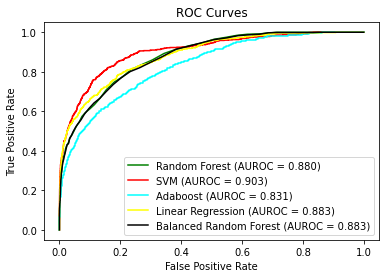

In [22]:
import matplotlib.pyplot as plt

plt.plot(rf_fpr, rf_tpr, color = "green", label = "Random Forest (AUROC = %0.3f)" %rf_auc)
plt.plot(svm_fpr, svm_tpr, color = "red", label = "SVM (AUROC = %0.3f)" %svm_auc)
plt.plot(adaboost_fpr, adaboost_tpr, color = "cyan", label = "Adaboost (AUROC = %0.3f)" %adaboost_auc)
plt.plot(lr_fpr, lr_tpr, color = "yellow", label = "Linear Regression (AUROC = %0.3f)" %lr_auc)
plt.plot(brf_fpr, brf_tpr, color = "black", label = "Balanced Random Forest (AUROC = %0.3f)" %lr_auc)


plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Unsupervised ML

KMeans Clustering

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)


from sklearn.metrics.cluster import adjusted_mutual_info_score
print("adjusted_mutual_info_score = " + str(adjusted_mutual_info_score(y_test,y_pred)))

from sklearn.metrics.cluster import homogeneity_score
print("homogeneity_score = " + str(homogeneity_score(y_test,y_pred)))

from sklearn.metrics.cluster import normalized_mutual_info_score
print("normalized_mutual_info_score = " + str(normalized_mutual_info_score(y_test,y_pred)))

from sklearn.metrics.cluster import rand_score
print("rand_score = " + str(rand_score(y_test,y_pred)))

adjusted_mutual_info_score = 0.0035498491393107074
homogeneity_score = 0.004973482410287551
normalized_mutual_info_score = 0.0036954675147043174
rand_score = 0.6718307179392085


Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering()
y_pred = agg_clustering.fit_predict(X)


print("adjusted_mutual_info_score = " + str(adjusted_mutual_info_score(y,y_pred)))

print("homogeneity_score = " + str(homogeneity_score(y,y_pred)))

print("normalized_mutual_info_score = " + str(normalized_mutual_info_score(y,y_pred)))

print("rand_score = " + str(rand_score(y, y_pred)))

adjusted_mutual_info_score = 0.028365112188181857
homogeneity_score = 0.033886963746522905
normalized_mutual_info_score = 0.028396380934546443
rand_score = 0.698538189972485


DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
y_pred = dbscan.fit_predict(X)


print("adjusted_mutual_info_score = " + str(adjusted_mutual_info_score(y,y_pred)))

print("homogeneity_score = " + str(homogeneity_score(y,y_pred)))

print("normalized_mutual_info_score = " + str(normalized_mutual_info_score(y,y_pred)))

print("rand_score = " + str(rand_score(y, y_pred)))

adjusted_mutual_info_score = -8.967646666923429e-06
homogeneity_score = 3.388427897891225e-05
normalized_mutual_info_score = 6.745640368257805e-05
rand_score = 0.8680281438475129
